# ACF와 PACF 두번쨰 실습

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
df = pd.read_csv('daily-min-temperatures.csv')

In [4]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


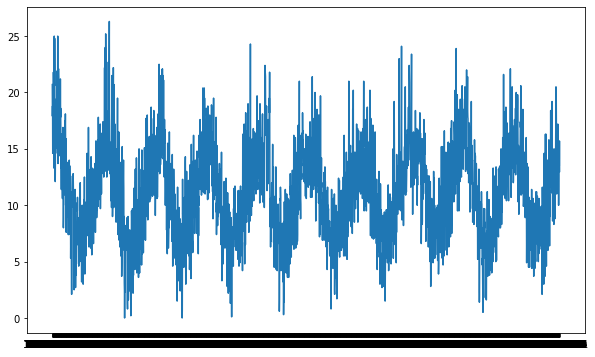

In [5]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
plt.plot(df['Date'], df['Temp'])
plt.show()

In [6]:
def acf(series, k):
    mean = series.mean()
    denominator = np.sum(np.square(series-mean))
    numerator = np.sum((series-mean)*(series.shift(k)-mean))
    acf_val = numerator/denominator
    return acf_val
def pacf(series,k):
    if k==0:
        pacf_val=1
    else:
        gamma_array = np.array([acf(series, k) for k in range(1, k+1)])
        gamma_matrix = []
        for i in range(k):
            temp= [0]*k
            temp[i:] = [acf(series, j) for j  in range(k-i)]
            gamma_matrix.append(temp)
        gamma_matrix = np.array(gamma_matrix)
        gamma_matrix = gamma_matrix + gamma_matrix.T- np.diag(gamma_matrix.diagonal())
        pacf_val = np.linalg.inv(gamma_matrix).dot(gamma_array)[-1]
    return pacf_val

In [7]:
[acf(df['Temp'],k) for k in range(11)]

[1.0,
 0.7742680015860551,
 0.6302865969690112,
 0.5852931172285417,
 0.5777456737862192,
 0.5772801338009084,
 0.5751041222457319,
 0.574370391230528,
 0.5678262189292026,
 0.5612013085259324,
 0.5466868903015352]

In [8]:
[pacf(df['Temp'], k) for k in range(11)]

[1,
 0.7742680015860551,
 0.07689129069065137,
 0.18905778648510174,
 0.15172425175628013,
 0.12945148713798893,
 0.10911056288921105,
 0.10280187736283919,
 0.07399257949393284,
 0.06979769989167739,
 0.03508666671973104]

# 함수 써보기

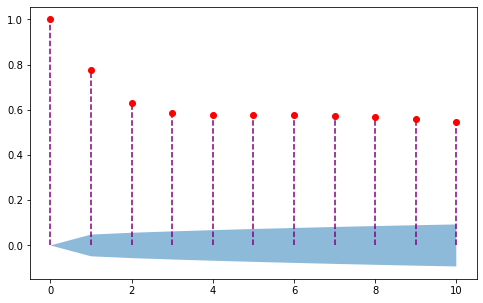

In [11]:
nlags = 10
acfs = [acf(df['Temp'],k) for k in range(nlags+1)]
x=range(nlags+1)
fig = plt.figure(figsize=(8, 5))
fig.set_facecolor('white')

markers, stemlines, baseline = plt.stem(x, acfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False)

n = len(df)
upper_limit=[]
lower_limit = []
for k in x:
    if k==0:
        upper_limit.append(0)
        lower_limit.append(0)
    else:
        term1 = np.sqrt((1+2*np.sum(np.square(acfs[1:k+1])))/n)
        upper_limit.append(1.96*term1)
        lower_limit.append(-1.96*term1)
        
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

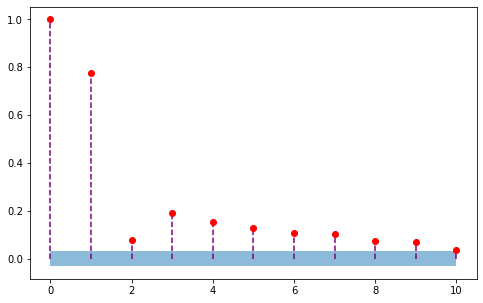

In [12]:
nlags =10
pacfs = [pacf(df['Temp'],k) for k in range(nlags+1)]
x = range(nlags+1)
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')

markers, stemlines, baseline = plt.stem(x, pacfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False)

n=len(df)
upper_limit = 1.96/np.sqrt(n)
lower_limit = -1.96/np.sqrt(n)
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

# statsmodels 모듈 써보기

In [13]:
sm.tsa.stattools.acf(df['Temp'], nlags=10, fft=False)

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689])

In [14]:
sm.tsa.stattools.pacf(df['Temp'], nlags=10, method='ywm')

array([1.        , 0.774268  , 0.07689129, 0.18905779, 0.15172425,
       0.12945149, 0.10911056, 0.10280188, 0.07399258, 0.0697977 ,
       0.03508667])

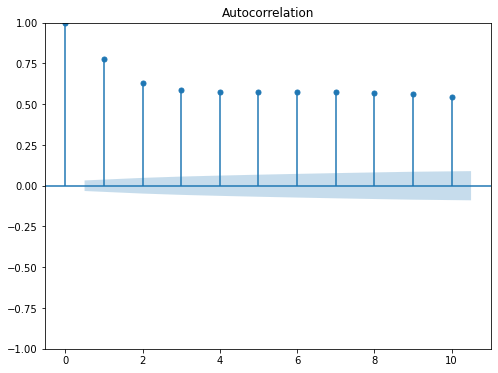

In [15]:
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(df['Temp'], lags=10, ax=ax)
plt.show()

C:\Users\phs51\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


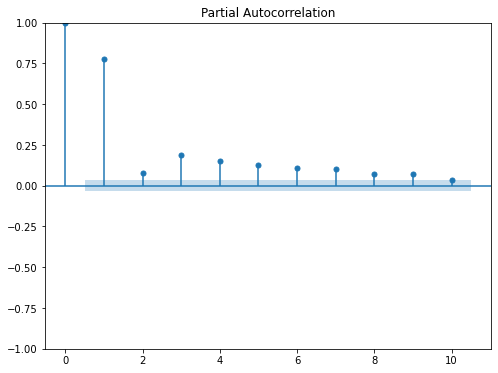

In [17]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax2 = fig.add_subplot()
sm.graphics.tsa.plot_pacf(df['Temp'], lags=10, ax=ax2)
plt.show()

파이팅!